In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_34/3067362131.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<h2>1. 데이터셋 불러오기</h2>

In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

<AxesSubplot: >

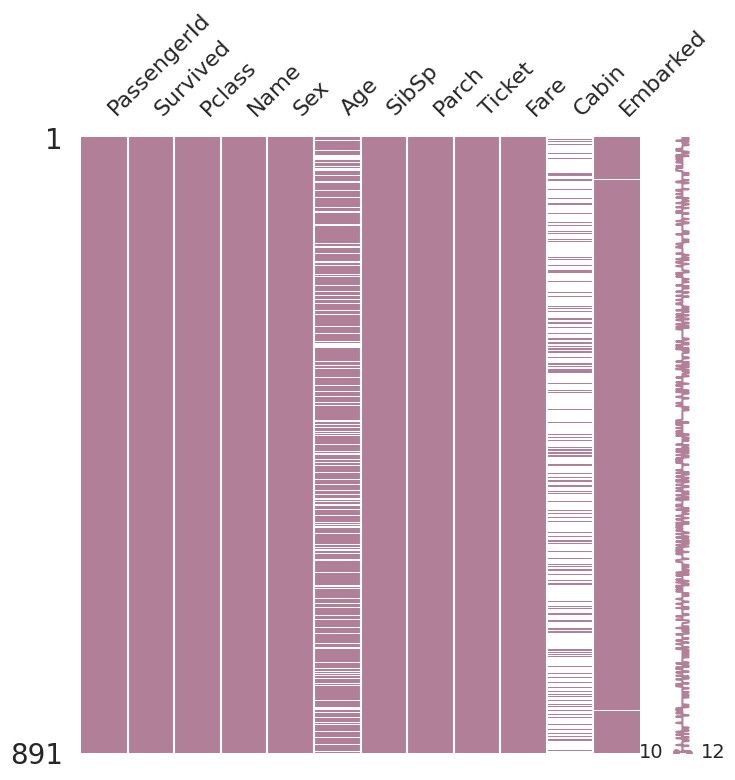

In [10]:
msno.matrix(df=train.iloc[:,:],figsize=(8,8),color=(0.7,0.5,0.6))

<AxesSubplot: >

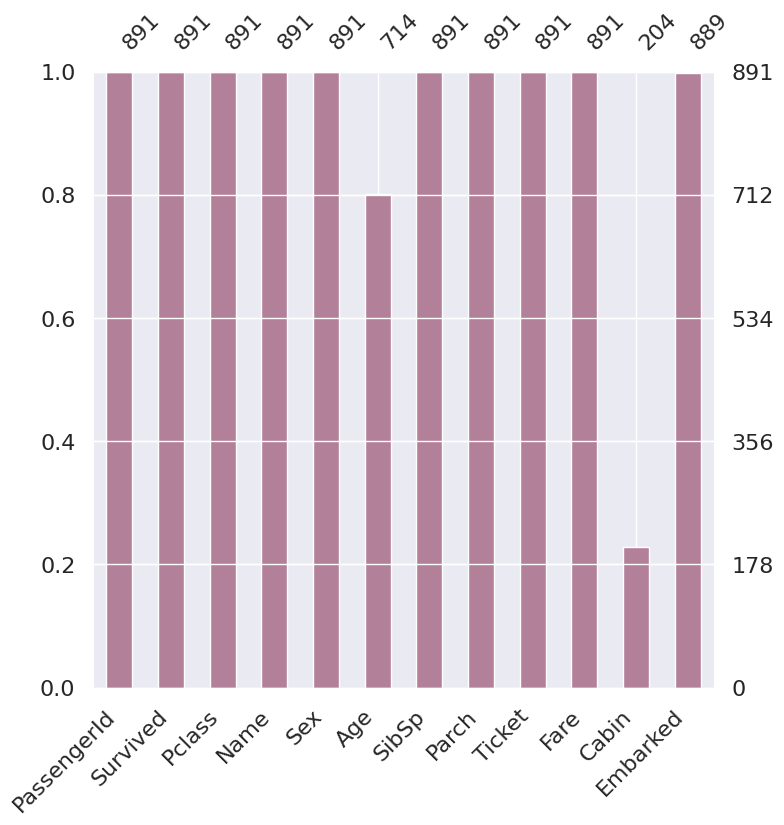

In [11]:
msno.bar(df=train.iloc[:,:],figsize=(8,8),color=(0.7,0.5,0.6))

<AxesSubplot: >

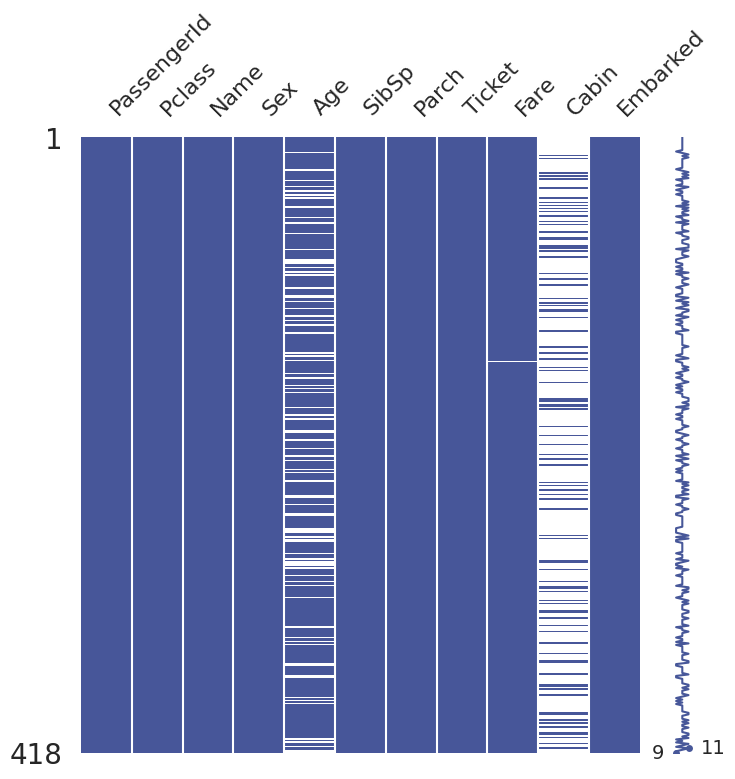

In [13]:
msno.matrix(df=test.iloc[:,:],figsize=(8,8),color=(0.28,0.34,0.6))

<AxesSubplot: >

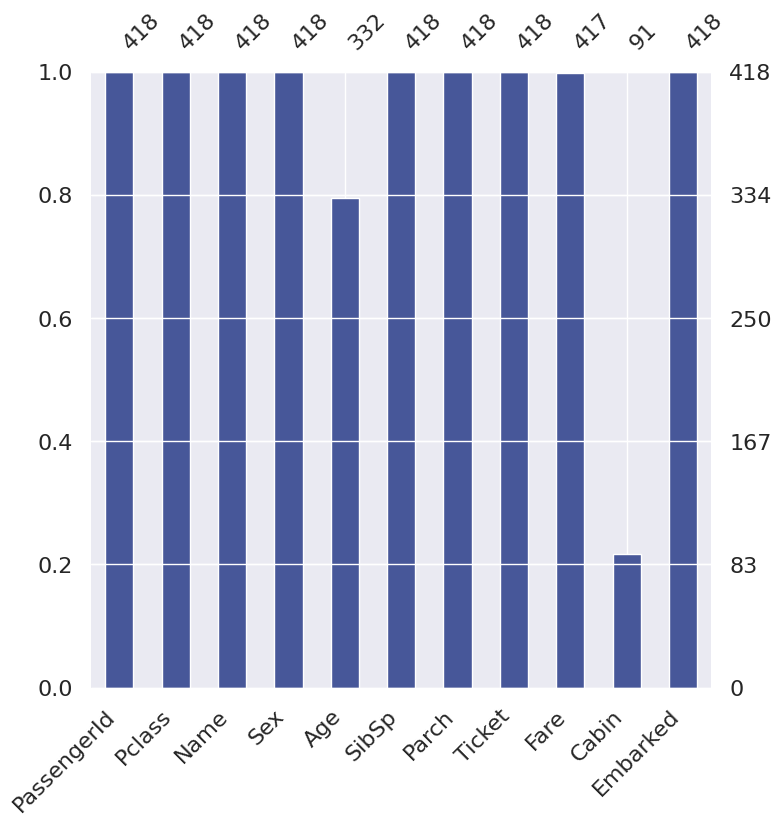

In [14]:
msno.bar(df=test.iloc[:,:],figsize=(8,8),color=(0.28,0.34,0.6))

<h2>1.2 Target label 확인</h2>

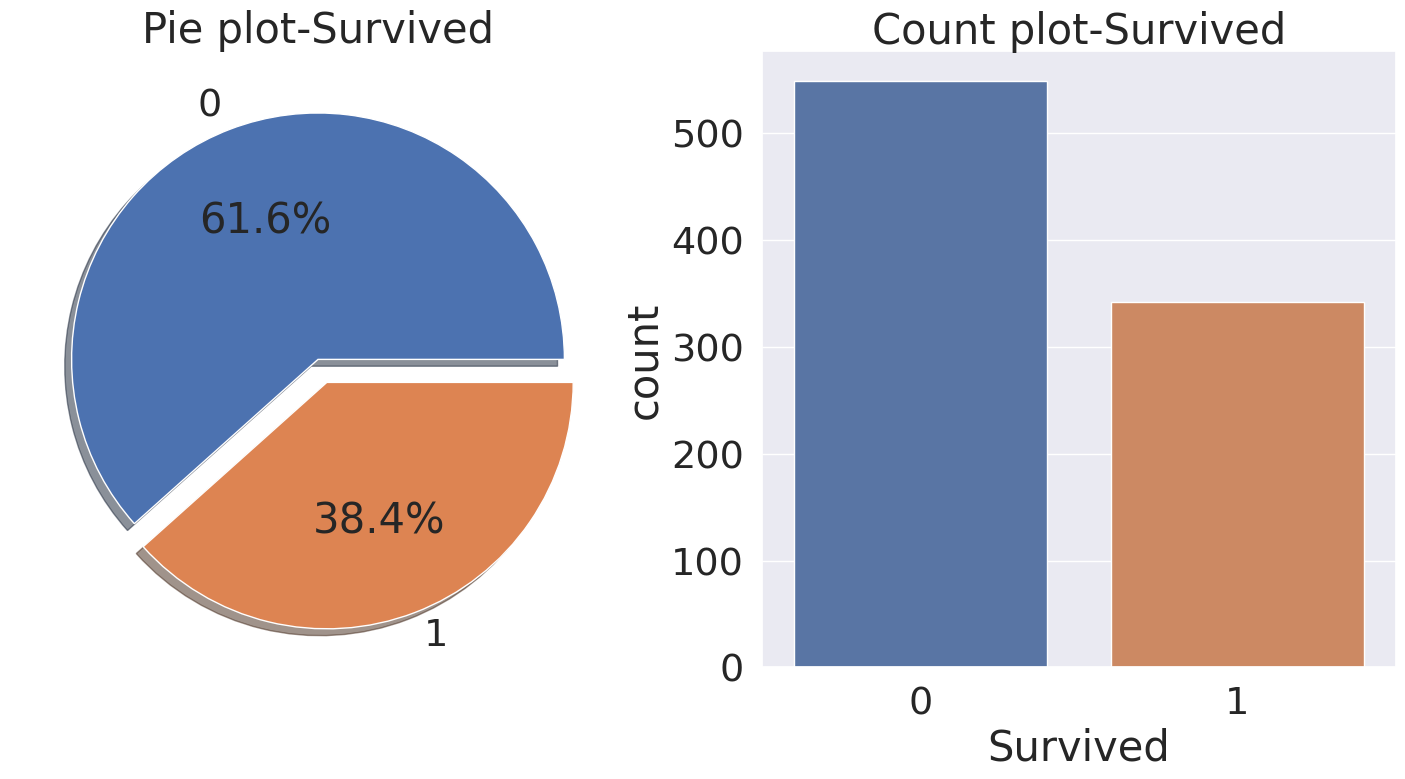

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))

train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot-Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived',data=train,ax=ax[1])
ax[1].set_title('Count plot-Survived')

plt.show()

In [18]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<h2>2. EDA</h2>

In [27]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [30]:
pd.crosstab(train['Pclass'],train['Survived'],margins=True).style.background_gradient(cmap='summer_R')

<AxesSubplot: xlabel='Pclass'>

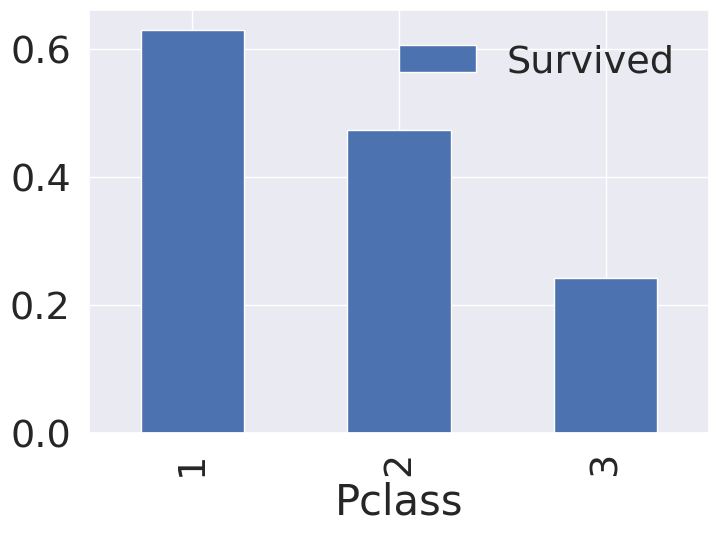

In [43]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().plot.bar()

<AxesSubplot: xlabel='Pclass', ylabel='count'>

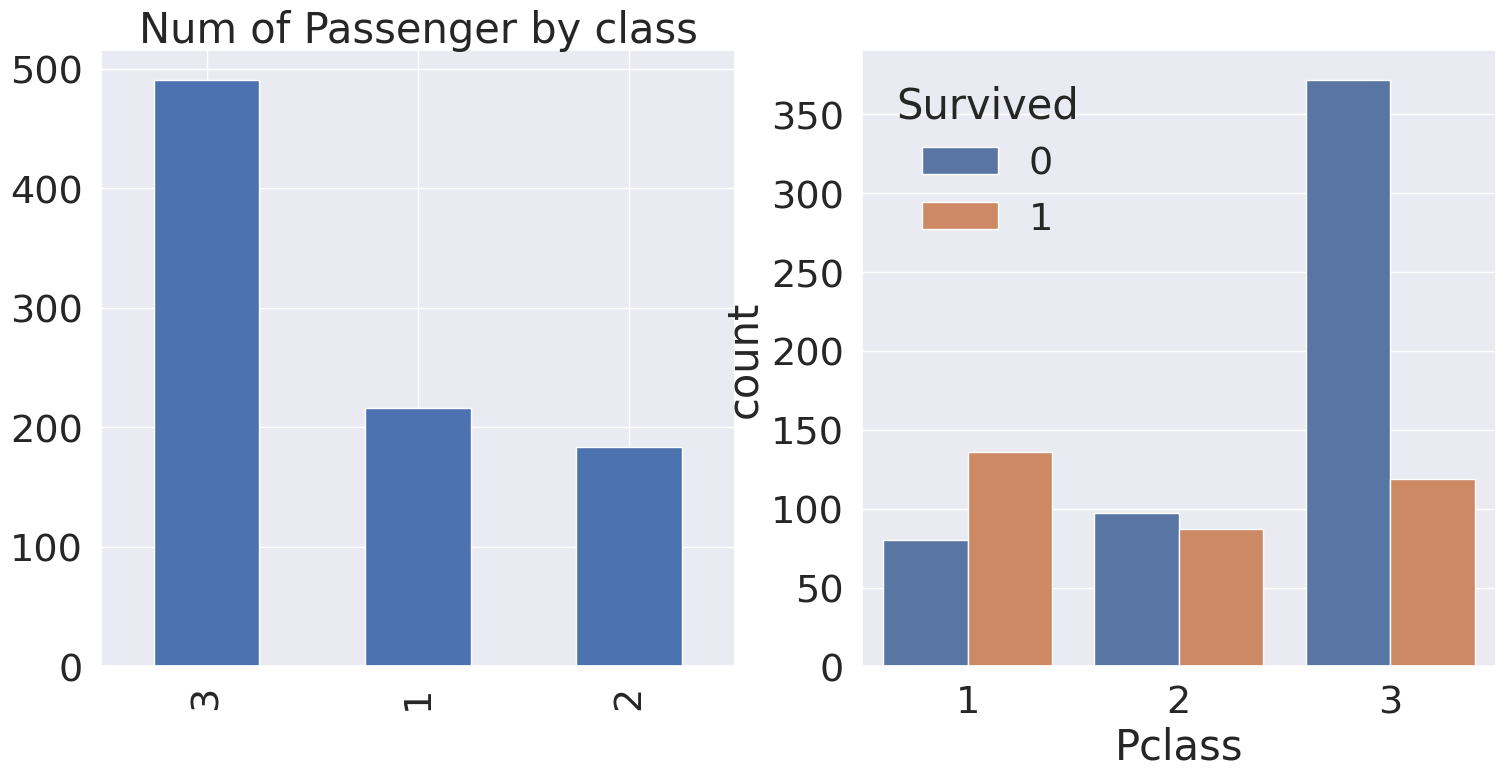

In [44]:
f,ax=plt.subplots(1,2,figsize=(18,8))

train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Num of Passenger by class')

sns.countplot(x='Pclass',hue='Survived',data=train)

<AxesSubplot: xlabel='Sex', ylabel='count'>

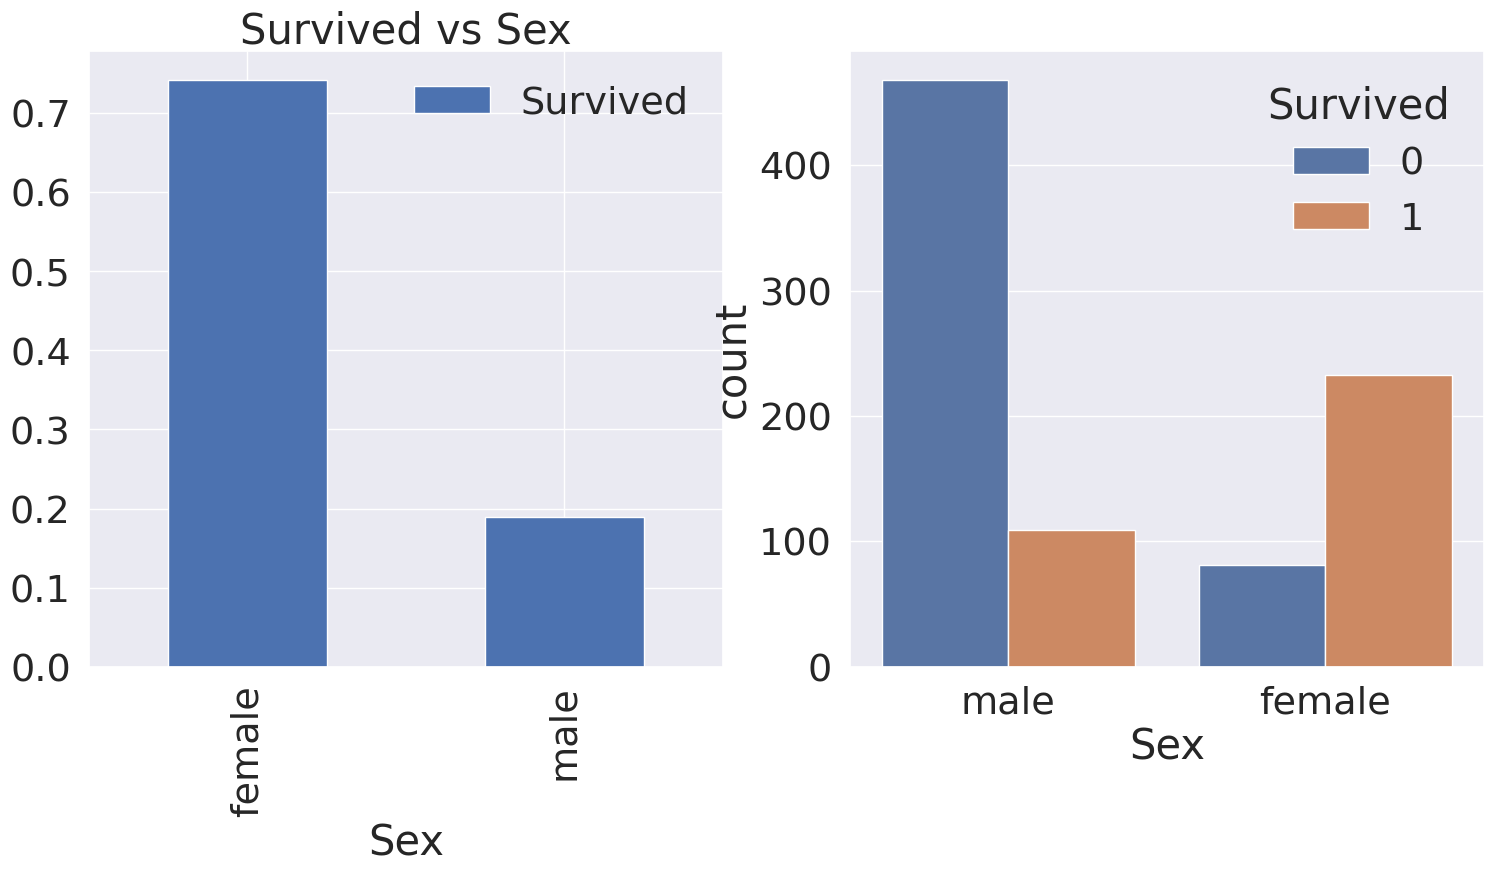

In [49]:
f,ax=plt.subplots(1,2,figsize=(18,8))

train[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue='Survived',data=train)

Text(0.5, 1.0, 'Survial Rate by Pclass and Sex')

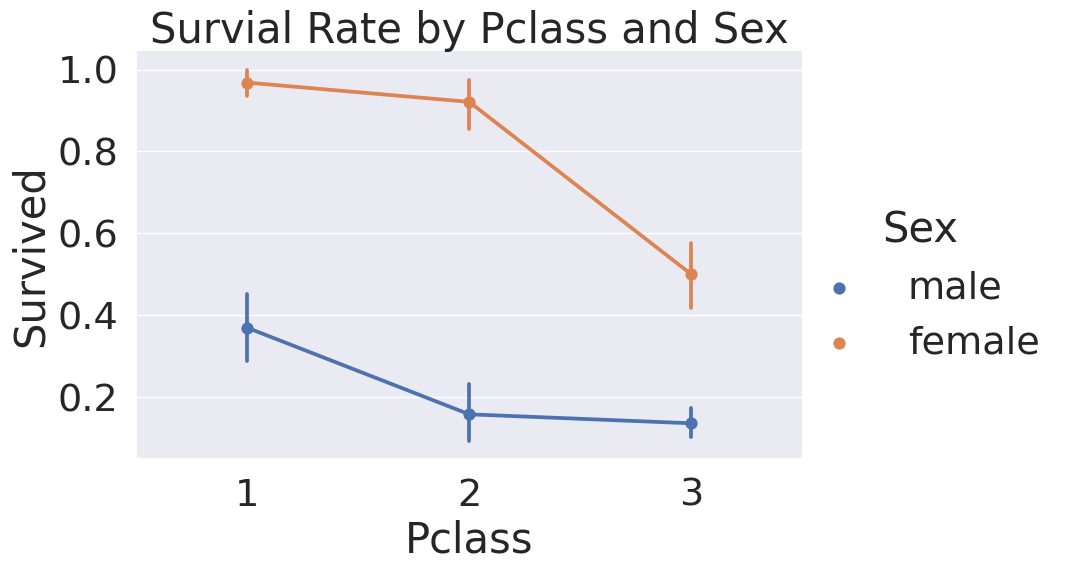

In [54]:
sns.catplot(x='Pclass',hue='Sex',y='Survived',data=train,kind='point',height=6,aspect=1.5)
plt.title('Survial Rate by Pclass and Sex')

In [59]:
train[train['Survived']==1]

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ...    ...   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch            Ticket     Fare Cabin Embarked  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
8        2            347742  11.1333   NaN        S  
9        0            237736  30.0708   NaN        C  
..     ...               ...      ...   ...      ...  
875      0              2667   7.2250   NaN        C  
879      1             11767  83.1583   C50        C  
880      1            230433  26.0000   NaN        S  
887      0            112053  30.0000   B42        S  
889      0            111369  30.0000  C148        C  

[342 rows x 12 columns]

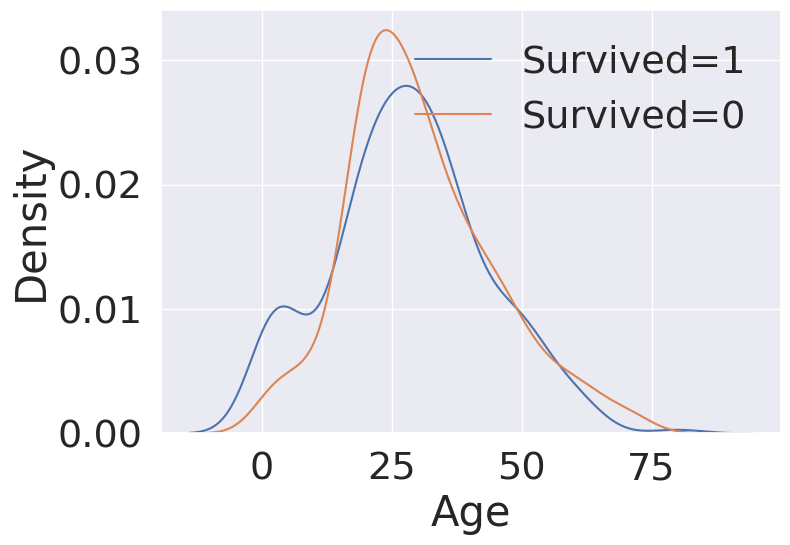

In [63]:
fig,ax=plt.subplots(1,1)
sns.kdeplot(train[train['Survived']==1]['Age'])
sns.kdeplot(train[train['Survived']==0]['Age'])
plt.legend(['Survived=1','Survived=0'])

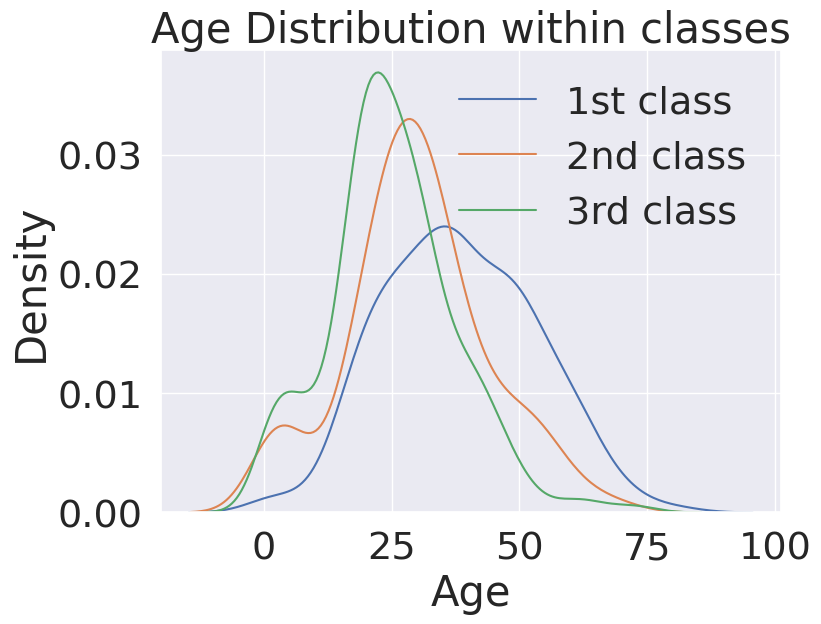

In [66]:
plt.figure(figsize=(8,6))
sns.kdeplot(train[train['Pclass']==1]['Age'])
sns.kdeplot(train[train['Pclass']==2]['Age'])
sns.kdeplot(train[train['Pclass']==3]['Age'])

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class','2nd class','3rd class'])

<AxesSubplot: xlabel='Sex', ylabel='Age'>

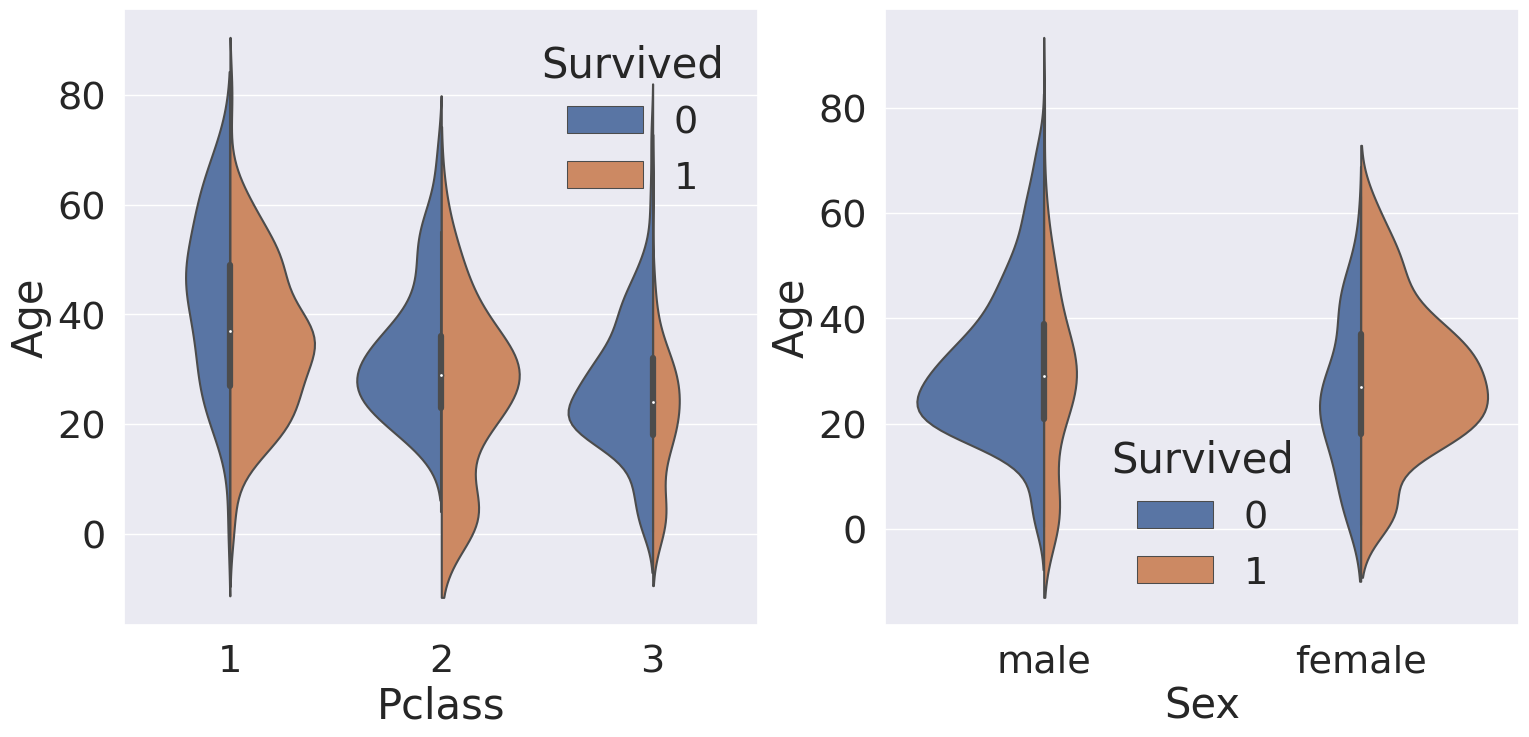

In [72]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x='Pclass',hue='Survived',y='Age',data=train,scale='count',ax=ax[0],split=True)
sns.violinplot(x='Sex',hue='Survived',y='Age',data=train,scale='count',ax=ax[1],split=True)